In [2]:
"""
Created on Tue Jul 13 14:50:37 2021

@author: A.Aladdin
@describtion : Trying to understand Exponential weighted moving average EWMA.
@target : trying to get hands-on understanding coding & visualization.
""";

In [3]:
'''
imagine we have data of prices of a stock (per day or hour anything)
we want to plot the EWMA ontop of it to get a smooth representation
of the historical path instead of the random fractal fluctuations of per (day/hour).

equation: 
    ewma(i) =  ewma(i-1) * (beta)  + value(i) * (1-beta)
    
    at ewma(0)= zero initially, assumption.. ,, 
    ewma(1) = value(1) * (1-fraction) --> 
    this fraction represent how much we depend on history
    (if 1 then we don't care about the current value -we want history only-)
    (if 0 (for ex) we depend on current value only )
    (a fraction between {0,1} correlates to your dependence on historical observations)
    
    now that we took a fraction of the historical observation
    the next iteration is where the magic happens ->
    ewma(2) =  ewma(1) * (fraction) + value(2) * (1-fraction)
    we can say its ewma(2) = (value(1) * fraction) * (fraction) +  value(2) * (1-fraction) 
    
    lets decompose it  .--> 
    ewma(2) = value(1) * fraction**2 + value(2) - value(2) * fraction 

    and the pattern can be deducted from the equation 
    as we make more steps ewma(n) 
    we strongly depend on 
        (1-fraction) of the current value and exponential fraction of the previous values
        ~smoothing by exponent of the fraction term (fraction**n)
  
    as if we are saying ~ 
    ewma(n) = fraction_1 (current value) + fraction_2(preivous historical values)**n
    where fraction_1 = 1-fraction_2
    it means if we depend more on history we depend less on current observation
    and vice versa.
    hence the equation
    current_ewma  = beta * previous_ewma  + (1-beta)(current_value)
''';

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#random values of prices
prices_arr = np.array([14.2,16.2,17.2,16.3,13.2,11.5,13.4,12.9,13.2])

In [5]:
def ewma(arr,beta):
    '''
    Parameters
    ----------
    arr : Input Values
    beta : fraction representing dependence on history
    "1/(1-beta)" representing the number of days we are averaging on.
    beta = 0.9 ~ we are averaging on previous 10 days
    beta = 0.5 ~ we are averaging on last two days.
    Returns
    -------
    ewm_list : the EWMA of the input array
    '''
    ewm_list = []
    ewm = arr[0] # just an offset to start on the real curve

    for i_element in arr:
        ewm =  ewm * beta + i_element * (1-beta)    
        ewm_list.append(ewm)

    return ewm_list 

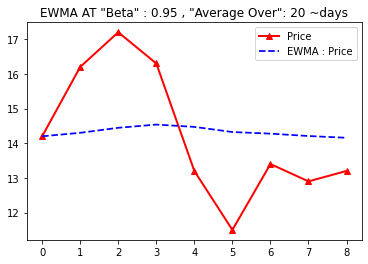

In [24]:
beta = 0.95
avg_over = round(1/(1-beta))
ewm_arr = ewma(prices_arr,beta)

plt.title('EWMA AT "Beta" : ' + str(beta) + ' , "Average Over": '+str(avg_over) +' ~days')
plt.plot(prices_arr,'red',linewidth=2,marker='^',label='Price') 
plt.plot(ewm_arr,'blue',linewidth=1.75,linestyle='--', label='EWMA : Price')

plt.legend()
plt.show()

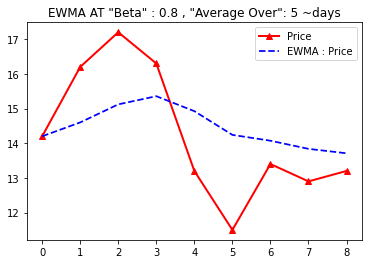

In [23]:
beta = 0.8
avg_over = round(1/(1-beta))
ewm_arr = ewma(prices_arr,beta)

plt.title('EWMA AT "Beta" : ' + str(beta) + ' , "Average Over": '+str(avg_over) +' ~days')
plt.plot(prices_arr,'red',linewidth=2,marker='^',label='Price') 
plt.plot(ewm_arr,'blue',linewidth=1.75,linestyle='--', label='EWMA : Price')

plt.legend()
plt.show()

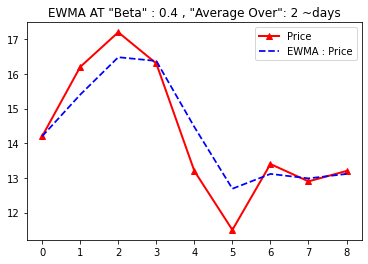

In [22]:
beta = 0.4
avg_over = round(1/(1-beta))
ewm_arr = ewma(prices_arr,beta)

plt.title('EWMA AT "Beta" : ' + str(beta) + ' , "Average Over": '+str(avg_over) +' ~days')
plt.plot(prices_arr,'red',linewidth=2,marker='^',label='Price') 
plt.plot(ewm_arr,'blue',linewidth=1.75,linestyle='--', label='EWMA : Price')

plt.legend()
plt.show()